In [13]:
import sys
sys.path.append("..")
from flame_analysis_model import *
import pandas as pd
import torch

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
if device.type == "cuda":
    print("GPU:", torch.cuda.get_device_name(0))

Using device: cuda
GPU: NVIDIA GeForce RTX 3050 4GB Laptop GPU


In [15]:
## Read data
df = pd.read_csv("extracted_flame_front_120.csv")

In [17]:
features = ['u', 'v', 'T', 'H2',
       'O2', 'H2O', 'H', 'O', 'OH', 'HO2', 'H2O2', 'N2', 'heat_release',
       'curvature', 'stretch_rate',
       'abs_flame_prop_vel_normal', 'flow_velocity_normal',
       'flow_velocity_tangential', 'tangential_strain_rate',
       'normal_strain_rate', 'total_strain_rate', 'density_ratio_sigma',
       'vorticity', 'omega_H2', 'omega_O2', 'omega_H2O', 'omega_H', 'omega_O',
       'omega_OH', 'omega_HO2', 'omega_H2O2', 'omega_N2', 'Le_def']
ml = MachineLearningModel(features=features, target="disp_speed_density_weighted", test_size=0.2, n_epoch= 200)
ml.prepare_data(df).build_model().train()


Epoch 1/200
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0608 - val_loss: 0.0422
Epoch 2/200
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - loss: 0.0350 - val_loss: 0.0281
Epoch 3/200
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - loss: 0.0297 - val_loss: 0.0239
Epoch 4/200
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - loss: 0.0258 - val_loss: 0.0235
Epoch 5/200
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - loss: 0.0233 - val_loss: 0.0238
Epoch 6/200
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - loss: 0.0219 - val_loss: 0.0208
Epoch 7/200
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - loss: 0.0213 - val_loss: 0.0180
Epoch 8/200
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - loss: 0.0197 - val_loss: 0.0170
Epoch 9/200
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - loss: 0.0202 - val_loss: 0.0181
Epoch 10/200
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step - loss: 0.0197 - val_loss: 0.0197
Epoch 11/200
642/642 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - loss: 0.0184 - val_loss: 0.0137
Epoch 12/200
642/642 

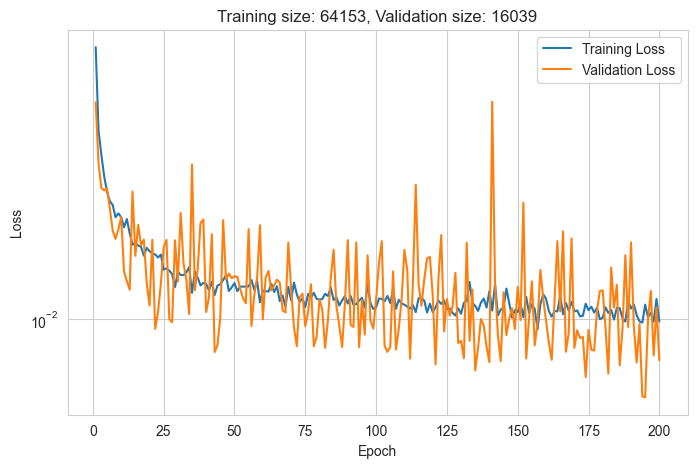

627/627 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


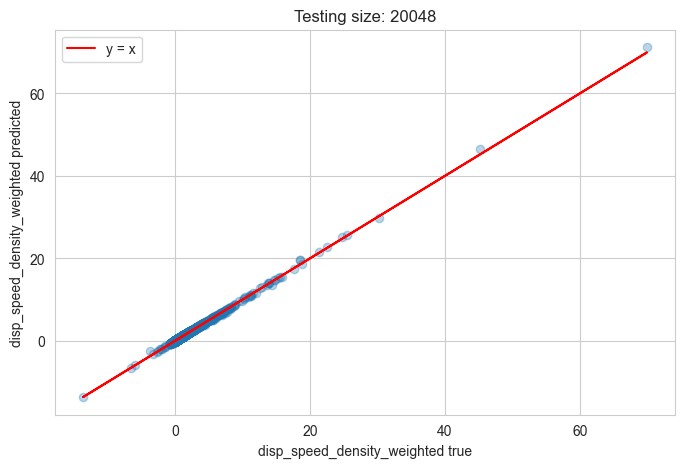

PermutationExplainer explainer: 501it [00:18, 12.03it/s]                         


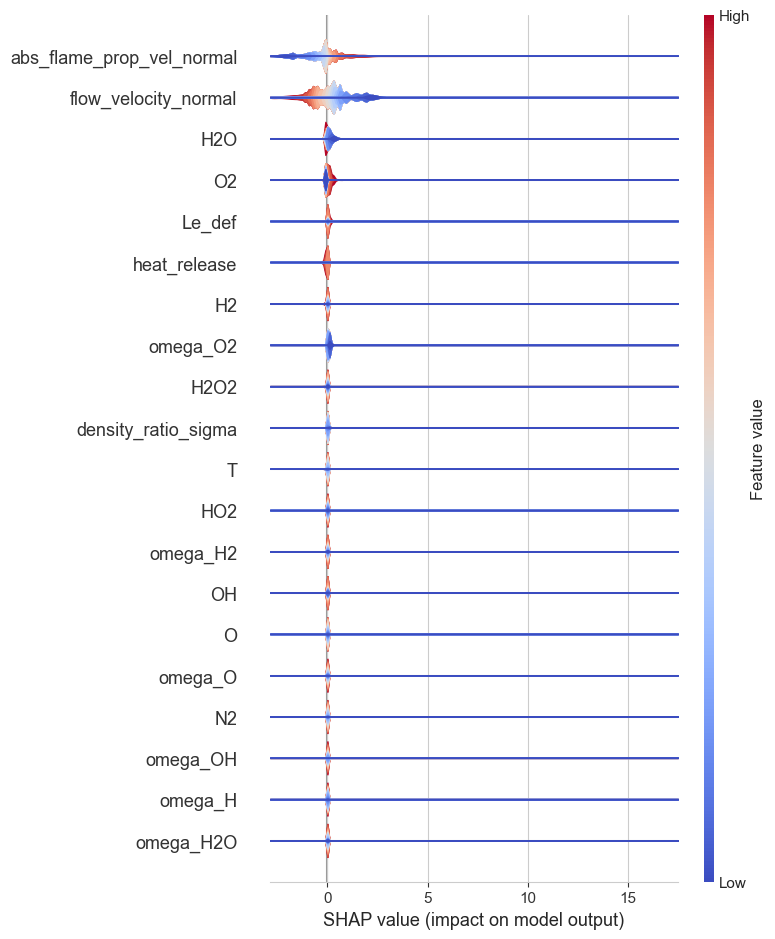

In [18]:
ml.plot_loss()
ml.evaluate()
ml.shap_summary()